In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
act_org = pd.read_csv('./dataset/ETT-small/ss_test.csv')
act = act_org[['date','OT']][:365]
act.head()

,date,OT
0,20210315,173.000000
1,20210316,157.000000
2,20210317,132.000000
3,20210318,174.663971
4,20210319,105.000000


(365, 6)


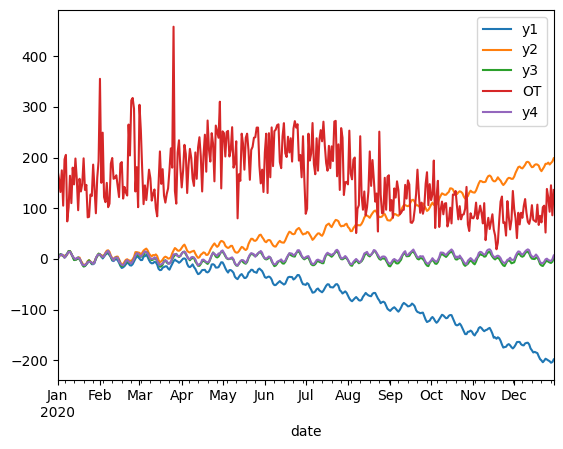

In [4]:

t = np.arange(365)
ts = pd.date_range(start="2020-01-01", freq="D", periods=len(t))

daily_seasonality = 5 * np.sin(2 * np.pi * t / 7)
weekly_seasonality = 10 * np.sin(2 * np.pi * t / (28))
trend = -0.0015 * t**2
y1 = trend  +daily_seasonality+ weekly_seasonality + np.random.randn(len(t))
trend = 0.0015 * t**2
y2 = trend  +daily_seasonality+ weekly_seasonality + np.random.randn(len(t))

trend = 0.0015 * t
y3 = trend +daily_seasonality + weekly_seasonality + np.random.randn(len(t))

trend = 0.0015 * t*10
y4 = trend  +daily_seasonality+ weekly_seasonality + np.random.randn(len(t))

df = pd.DataFrame(data=y1, index=ts, columns=["y1"])

df['date'] = df.index
df['y1'] = y1
df['y2'] = y2
df['y3'] = y3
df['y4'] = y4

df['OT'] = act['OT'].tolist()
# df.plot(x='date',y=['act'])
df.plot(x='date',y=['y1','y2','y3','OT','y4'])
# print('斜率',df['y1'][-1]/df['y1'][0]/len(df))

print(df.shape)
plt.show()


In [5]:
df.head()

,y1,date,y2,y3,y4,OT
2020-01-01,-0.190417,2020-01-01,0.610463,0.034569,-0.559319,173.000000
2020-01-02,5.298612,2020-01-02,5.968151,5.838670,4.939991,157.000000
2020-01-03,9.265334,2020-01-03,8.438247,9.190330,7.428753,132.000000
2020-01-04,7.965439,2020-01-04,6.705436,8.007402,8.861689,174.663971
2020-01-05,6.025920,2020-01-05,6.917036,5.576559,6.414933,105.000000


In [6]:
df.to_csv('./dataset/ETT-small/sin_df.csv',index=False)

In [130]:
rate_res = []
for c in ['y1','y2','y3','y4','OT']:
    for t in [7,28,90,180]:
        l = []
        l.append(c)
        l.append(t)
        r = df[c][-1]/df[c][t]
        l.append(r)
        # print(f'{c}_{t} 斜率: ',df[c][-1]/df[c][t])
        rate_res.append(l)
rate_df = pd.DataFrame(rate_res,columns=['c','t','r'])
# rate_df

/var/folders/1c/gvmr41_570nfpjsvv31hbnxh0000gn/T/ipykernel_22533/1898828319.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  r = df[c][-1]/df[c][t]


In [131]:
rate_df_pi = rate_df.pivot_table(index=['c'],
                columns = 't',values='t',aggfunc='first')\
         .reset_index()\
         .rename_axis(None, axis=1)
rate_df_pi2 = rate_df_pi.T
rate_df_pi2.columns = ['OT','y1','y2','y3','y4']
rate_df_pi3 = rate_df_pi2[1:]
rate_df_pi3['t'] = rate_df_pi3.index
rate_df_pi3

/var/folders/1c/gvmr41_570nfpjsvv31hbnxh0000gn/T/ipykernel_22533/183408073.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rate_df_pi3['t'] = rate_df_pi3.index


,OT,y1,y2,y3,y4,t
7,1.837838,-23.632991,17.95417,-0.063311,0.555392,7
28,1.511111,89.468532,218.245336,0.760211,-3.409042,28
90,0.755556,39.495326,10.171017,-0.083427,0.558556,90
180,0.561983,4.008649,4.186729,1.820016,1.834624,180


<Axes: xlabel='t'>

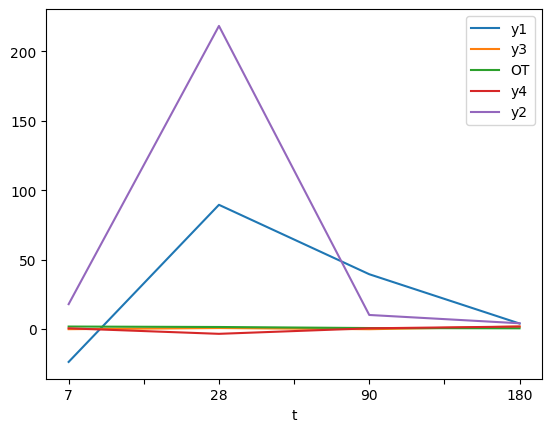

In [132]:
rate_df_pi3.plot(x='t',y=['y1','y3','OT','y4','y2'])

In [133]:
df.head()

,y1,date,y2,y3,y4,OT
2020-01-01,1.506692,2020-01-01,0.248911,1.078546,-1.368541,173.000000
2020-01-02,7.500864,2020-01-02,7.065618,6.758579,6.367631,157.000000
2020-01-03,9.825643,2020-01-03,10.523454,8.351542,8.982859,132.000000
2020-01-04,8.828928,2020-01-04,9.072172,8.795214,9.171790,174.663971
2020-01-05,5.741475,2020-01-05,6.220656,3.666319,4.868113,105.000000


In [190]:

# 定义一个函数来计算斜率
def calculate_slope(window):
    window = window.tolist()
    x=list(range(len(window)))
    r=np.polyfit(x=x,y=window,deg=1)[0]
    return r

# 使用滑动窗口计算斜率
for period in [7,28,90,120,180]:
    for c in ['y1','y2','y3','y4','OT']:
        # print(c)
        df[f'slope_{c}_{period}'] = df[c].rolling(period).apply(calculate_slope, raw=False)
df.head(10)

,y1,date,y2,y3,y4,OT,slope_y1_7,slope_y2_7,slope_y3_7,slope_y4_7,...,slope_y1_120,slope_y2_120,slope_y3_120,slope_y4_120,slope_OT_120,slope_y1_180,slope_y2_180,slope_y3_180,slope_y4_180,slope_OT_180
2020-01-01,1.506692,2020-01-01,0.248911,1.078546,-1.368541,173.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,7.500864,2020-01-02,7.065618,6.758579,6.367631,157.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,9.825643,2020-01-03,10.523454,8.351542,8.982859,132.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,8.828928,2020-01-04,9.072172,8.795214,9.171790,174.663971,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,5.741475,2020-01-05,6.220656,3.666319,4.868113,105.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,5.271743,2020-01-06,5.186776,5.482223,5.007116,196.428802,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,5.832009,2020-01-07,6.508025,5.959124,5.926743,205.158463,0.158341,0.382745,0.264421,0.537503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,8.428560,2020-01-08,11.096144,9.813405,8.226632,74.000000,-0.312906,0.006262,0.038095,-0.167854,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-09,14.054983,2020-01-09,13.737693,12.483005,12.135268,102.000000,0.427779,0.499215,0.597271,0.308055,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-10,14.255292,2020-01-10,13.159467,13.373177,13.946776,164.000000,1.287962,1.185905,1.274944,1.145671,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [191]:
slope_cs = [c for c in df.columns if 'slope' in c]
# slope_cs

In [192]:
df[['slope_y1_7']][6:].values.reshape(1,-1).shape

(1, 359)

In [193]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [194]:
# df.head(10)

y1_OT_7 相似度 :  [[-0.1500073]]


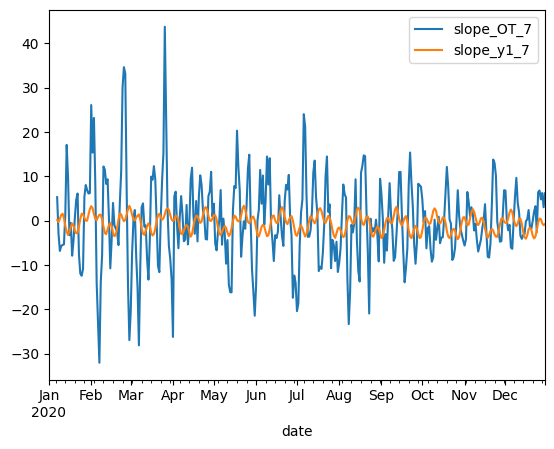

y1_OT_28 相似度 :  [[0.21721473]]


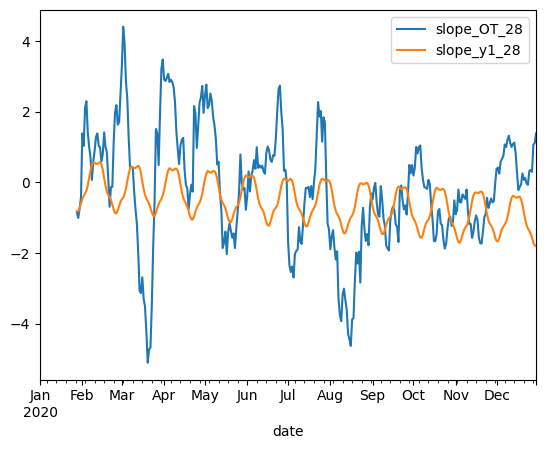

y1_OT_90 相似度 :  [[0.62075897]]


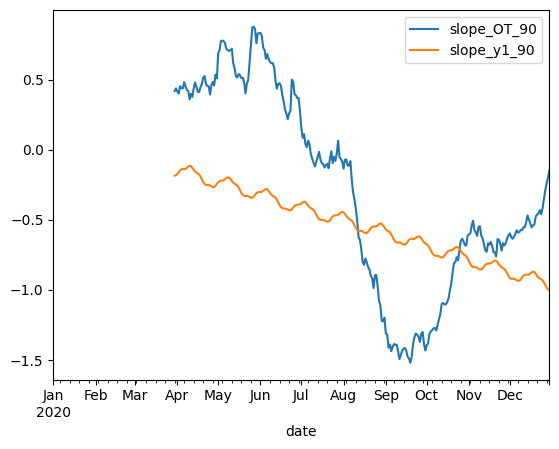

y1_OT_120 相似度 :  [[0.66765517]]


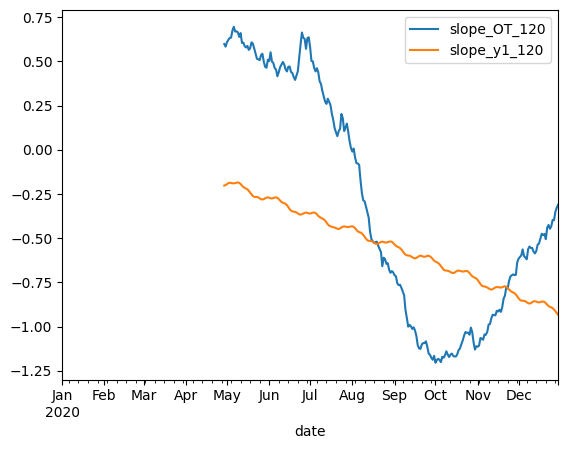

y1_OT_180 相似度 :  [[0.79857776]]


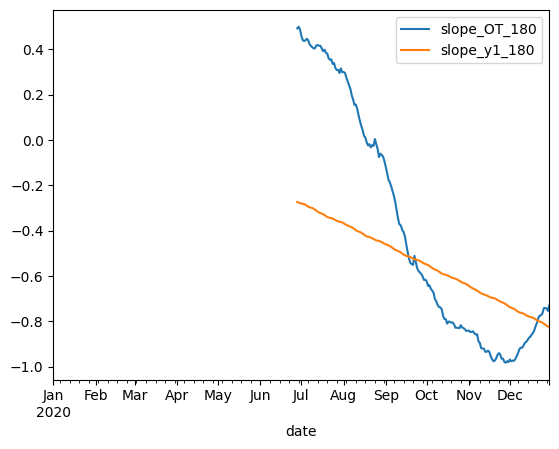

y2_OT_7 相似度 :  [[-0.14586444]]


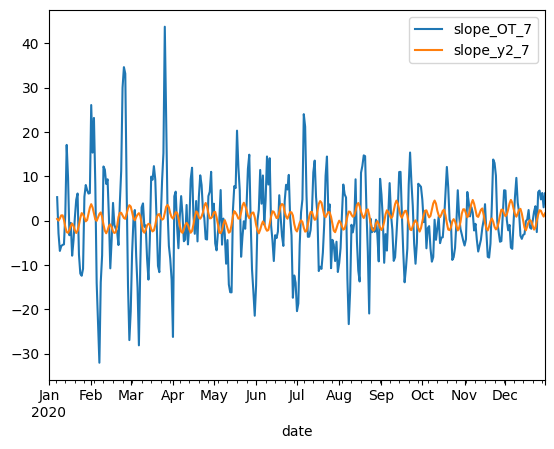

y2_OT_28 相似度 :  [[-0.11318305]]


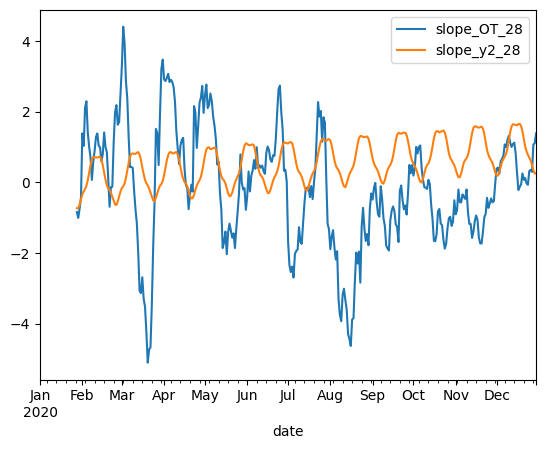

y2_OT_90 相似度 :  [[-0.61894764]]


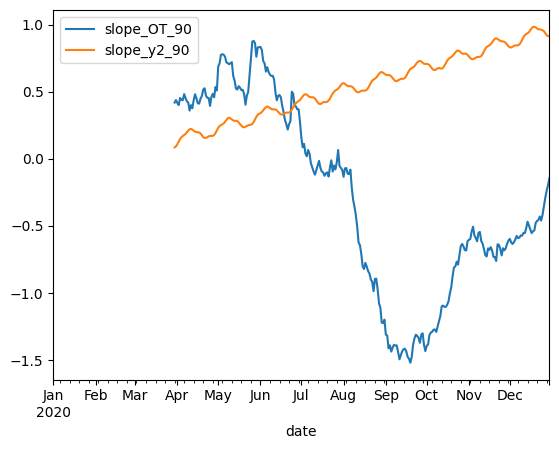

y2_OT_120 相似度 :  [[-0.66750206]]


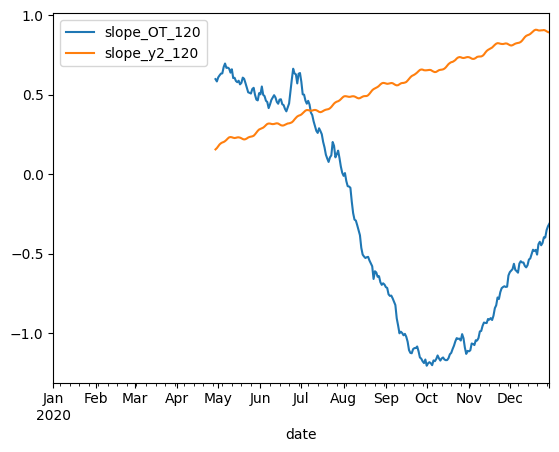

y2_OT_180 相似度 :  [[-0.79910061]]


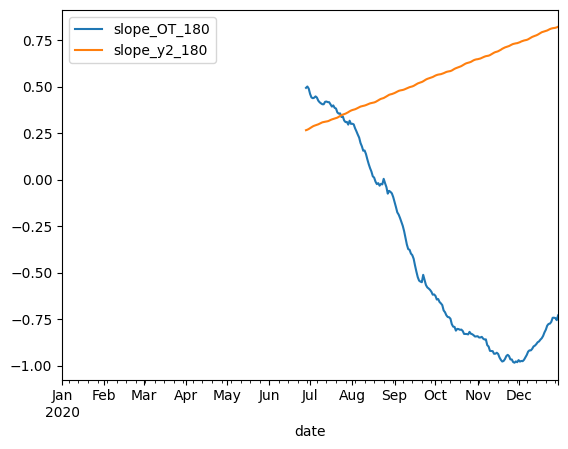

y3_OT_7 相似度 :  [[-0.1556945]]


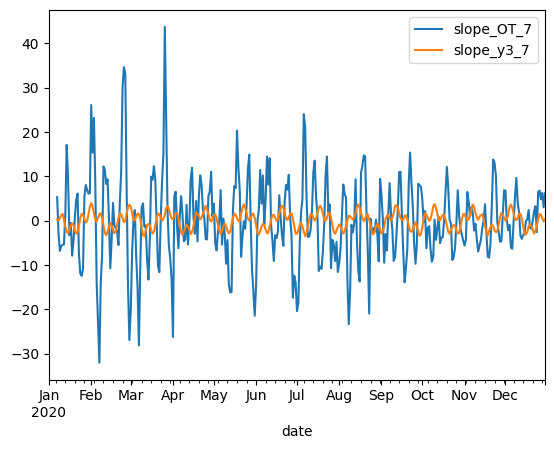

y3_OT_28 相似度 :  [[0.08762031]]


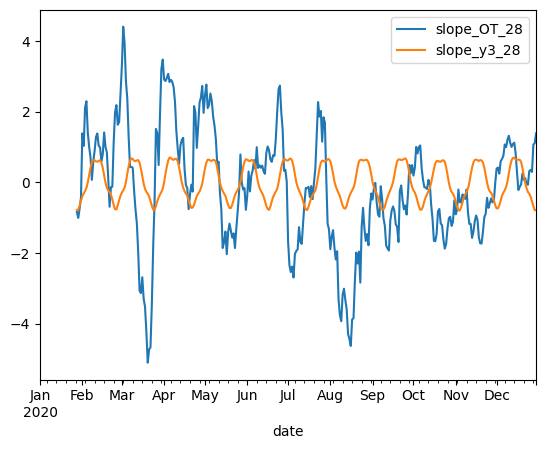

y3_OT_90 相似度 :  [[0.07960471]]


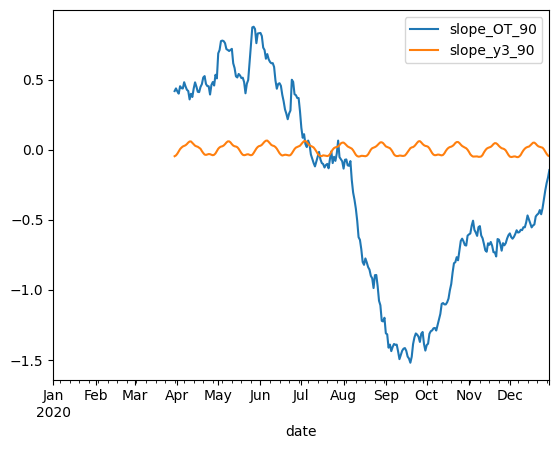

y3_OT_120 相似度 :  [[0.13125757]]


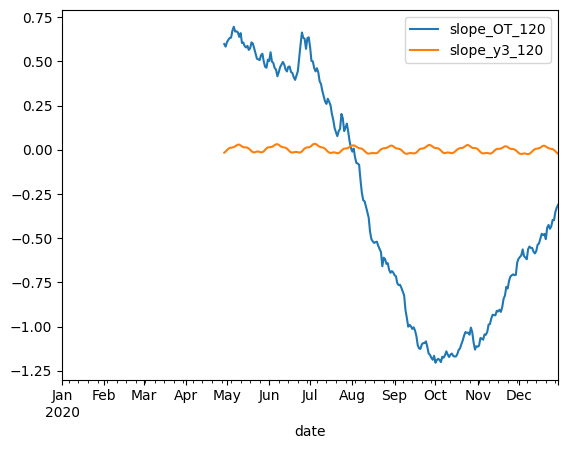

y3_OT_180 相似度 :  [[0.29326202]]


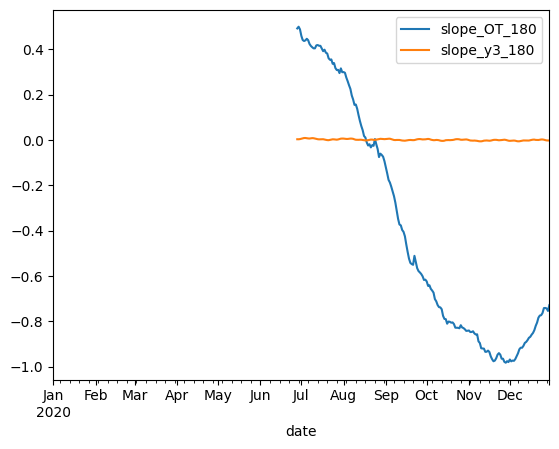

y4_OT_7 相似度 :  [[-0.14622638]]


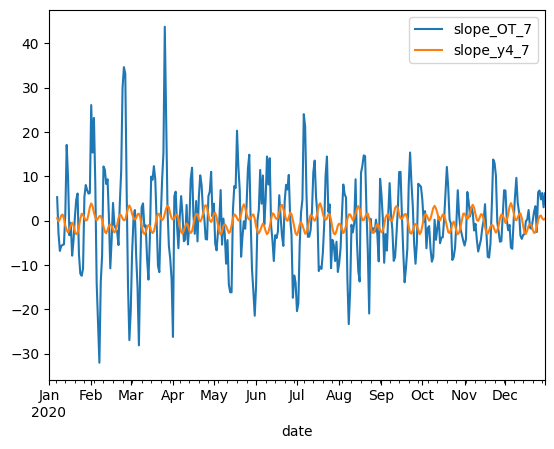

y4_OT_28 相似度 :  [[0.08607027]]


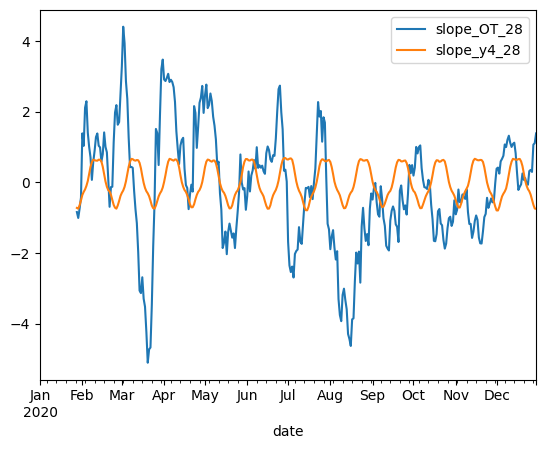

y4_OT_90 相似度 :  [[-0.15294808]]


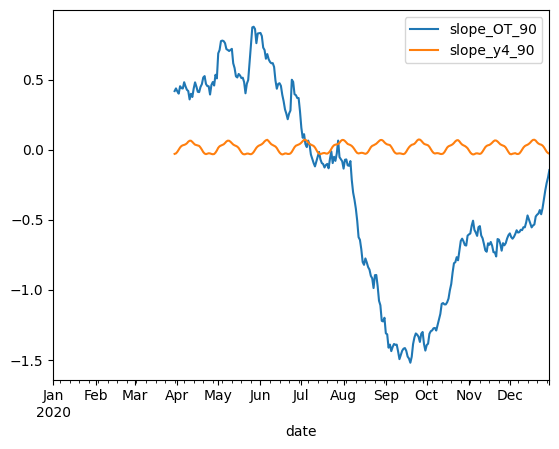

y4_OT_120 相似度 :  [[-0.31922972]]


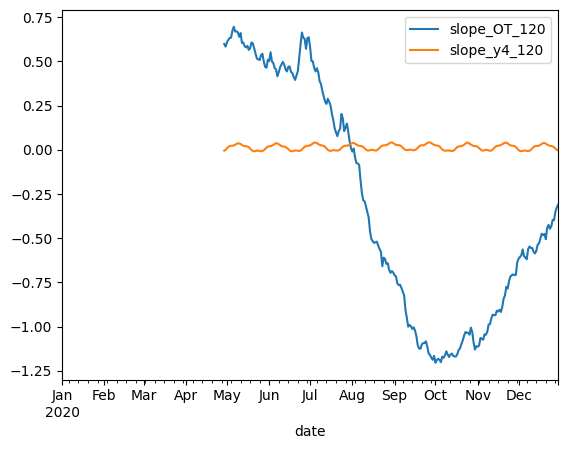

y4_OT_180 相似度 :  [[-0.6329121]]


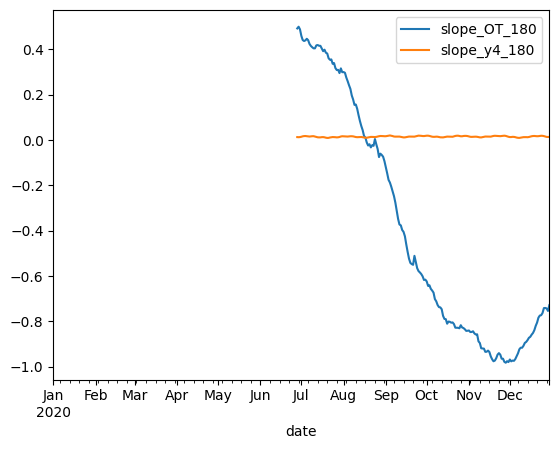

In [195]:
base_c = 'OT'
for c in ['y1','y2','y3','y4']:
    for t in [7,28,90,120,180]:
        vec1 = df[[f'slope_{c}_{t}']][t-1:].values.reshape(1,-1)
        vec2 = df[[f'slope_{base_c}_{t}']][t-1:].values.reshape(1,-1)
        # 计算余弦相似度
        similarity = cosine_similarity(vec1, vec2)
        print(f"{c}_{base_c}_{t} 相似度 : ",similarity)
        df.plot(x='date',y=[f'slope_{base_c}_{t}',f'slope_{c}_{t}'])
        plt.show()

In [157]:

vec1 = df[['slope_y1_7']][6:].values.reshape(1,-1)
vec2 = df[['slope_y2_7']][6:].values.reshape(1,-1)
# 计算余弦相似度
similarity = cosine_similarity(vec1, vec2)
print(similarity)


[[0.77984098]]


In [158]:
vec1 = df[['slope_y1_7']][6:].values.reshape(1,-1)
vec2 = df[['slope_OT_7']][6:].values.reshape(1,-1)
# 计算余弦相似度
similarity = cosine_similarity(vec1, vec2)
print(similarity)


[[-0.1500073]]


In [159]:
vec1 = df[['slope_y3_7']][6:].values.reshape(1,-1)
vec2 = df[['slope_OT_7']][6:].values.reshape(1,-1)
# 计算余弦相似度
similarity = cosine_similarity(vec1, vec2)
print(similarity)


[[-0.1556945]]


In [160]:
vec1 = df[['slope_y4_7']][6:].values.reshape(1,-1)
vec2 = df[['slope_OT_7']][6:].values.reshape(1,-1)
# 计算余弦相似度
similarity = cosine_similarity(vec1, vec2)
print(similarity)


[[-0.14622638]]


In [ ]:
"""  
数据预期：
1. OT 整体是平缓的，y1 是下降的，y2是上涨的，y3/y4是平缓的趋势较小；所以 y3/y4趋势相似分数最高，y1\y2不相似，OT与y3\y4相似

"""

<Axes: xlabel='date'>

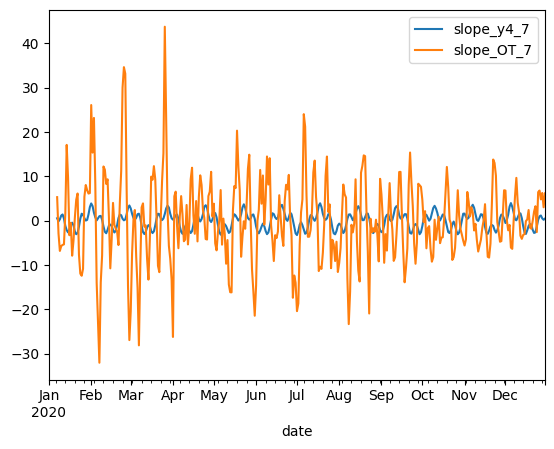

In [163]:
df.plot(x='date',y=['slope_y4_7','slope_OT_7'])

<Axes: xlabel='date'>

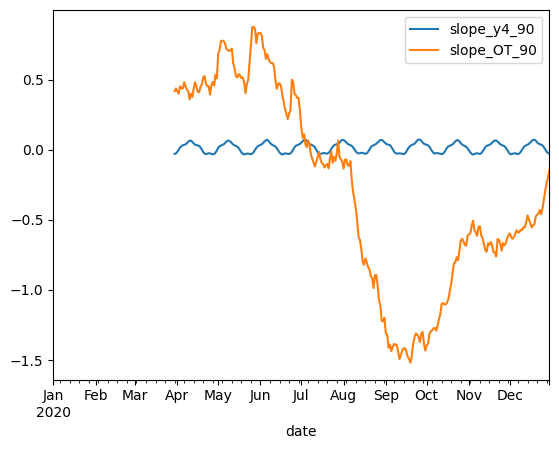

In [164]:
df.plot(x='date',y=['slope_y4_90','slope_OT_90'])

In [161]:
vec1 = df[['slope_y4_7']][6:].values.reshape(1,-1)
vec2 = df[['slope_y3_7']][6:].values.reshape(1,-1)
# 计算余弦相似度
similarity = cosine_similarity(vec1, vec2)
print(similarity)


[[0.98956156]]


In [150]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 创建两个向量
vec1 = np.array([[1, 2, 3]])
vec2 = np.array([[2, 3, 4]])

# 计算余弦相似度
similarity = cosine_similarity(vec1, vec2)

print(similarity)

[[0.99258333]]


<Axes: xlabel='date'>

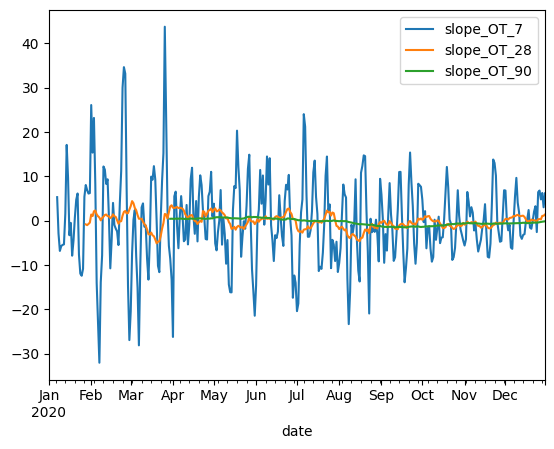

In [144]:
df.plot(x='date',y=['slope_OT_7','slope_OT_28','slope_OT_90'])

In [146]:
df.isnull().sum()

y1              0
date            0
y2              0
y3              0
y4              0
OT              0
slope_y1_7      6
slope_y2_7      6
slope_y3_7      6
slope_y4_7      6
slope_OT_7      6
slope_y1_28    27
slope_y2_28    27
slope_y3_28    27
slope_y4_28    27
slope_OT_28    27
slope_y1_90    89
slope_y2_90    89
slope_y3_90    89
slope_y4_90    89
slope_OT_90    89
dtype: int64

<Axes: xlabel='date'>

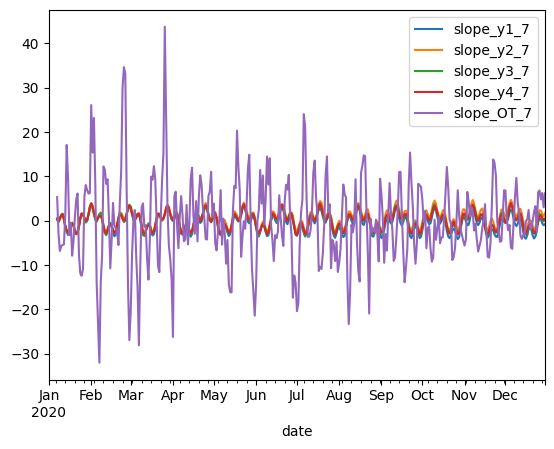

In [147]:
df.plot(x='date',y=['slope_y1_7','slope_y2_7','slope_y3_7','slope_y4_7','slope_OT_7'])

<Axes: xlabel='date'>

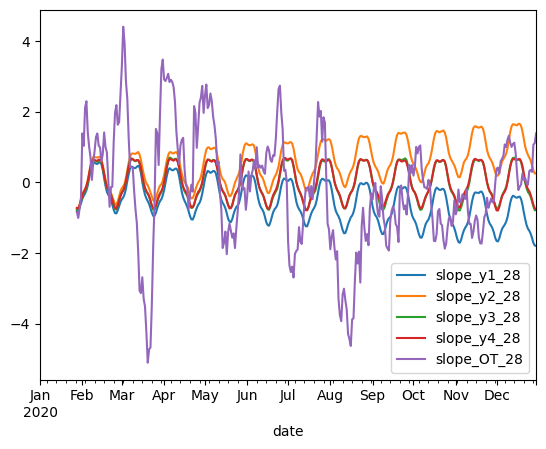

In [143]:
# df.plot(x='date',y=['slope_y1','slope_y2','slope_y3','slope_y4','slope_OT'])
df.plot(x='date',y=['slope_y1_28','slope_y2_28','slope_y3_28','slope_y4_28','slope_OT_28'])

<Axes: xlabel='date'>

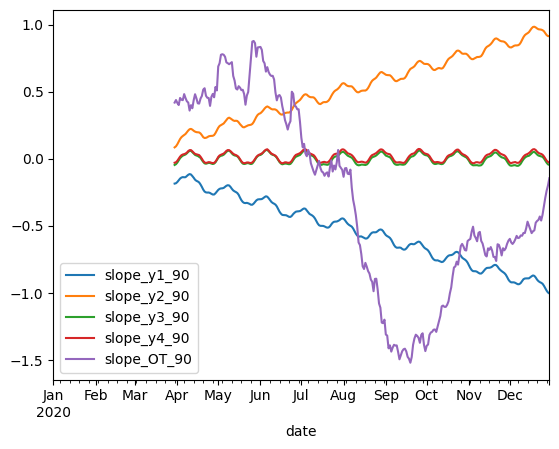

In [145]:
df.plot(x='date',y=['slope_y1_90','slope_y2_90','slope_y3_90','slope_y4_90','slope_OT_90'])

In [71]:
import pandas as pd
import numpy as np

# 创建一个简单的 DataFrame
df = pd.DataFrame({
    'x': range(10),
    'y': range(10)
})
# df

In [81]:

# 定义一个函数来计算斜率
def calculate_slope(window):
    window = window.tolist()
    x=list(range(len(window)))
    r=np.polyfit(x=x,y=window,deg=1)[0]
    return r

# 使用滑动窗口计算斜率
df['slope'] = df['x'].rolling(5).apply(calculate_slope, raw=False)
df

,x,y,slope
0,0,0,NaN
1,1,1,NaN
2,2,2,NaN
3,3,3,NaN
4,4,4,1.0
5,5,5,1.0
6,6,6,1.0
7,7,7,1.0
8,8,8,1.0
9,9,9,1.0


In [30]:
max(daily_seasonality),min(daily_seasonality)

(4.874639560909159, -4.8746395609091415)

In [30]:
# 07_paper/Autoformer-main/dataset/ETT-small/test_data.csv
df.to_csv('./dataset/ETT-small/sim_df.csv',index=False)

In [39]:
# 982/7,[-982//7*7:]
tt = list(range(982))
len(tt)//7*7,len(tt[-980:])*0.7,len(tt[-980:])*0.2,len(tt[-980:])*0.1,
# -7,-7

(980, 686.0, 196.0, 98.0)

斜率 -4.359558727568993
(999, 5)


/var/folders/1c/gvmr41_570nfpjsvv31hbnxh0000gn/T/ipykernel_85584/1650936551.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('斜率',df['y1'][-1]/df['y1'][0]/len(df))


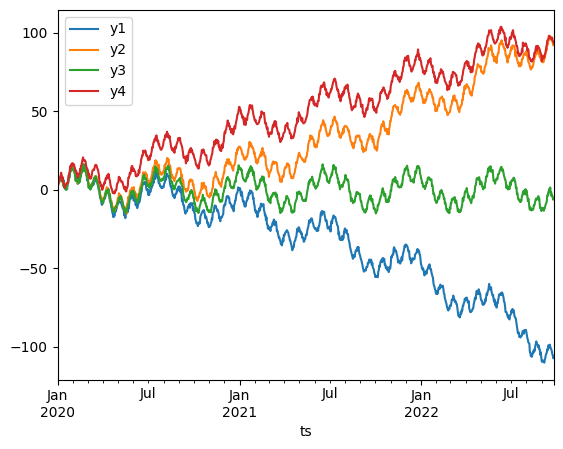

In [48]:

t = np.arange(1, 1000)
ts = pd.date_range(start="2020-01-01", freq="D", periods=len(t))

daily_seasonality = 5 * np.sin(2 * np.pi * t / 24)
weekly_seasonality = 10 * np.sin(2 * np.pi * t / (24 * 7))
trend = -0.0001 * t**2
y1 = trend + daily_seasonality + weekly_seasonality + np.random.randn(len(t))
trend = 0.0001 * t**2
y2 = trend + daily_seasonality + weekly_seasonality + np.random.randn(len(t))

trend = 0.0001 * t
y3 = trend + daily_seasonality + weekly_seasonality + np.random.randn(len(t))

trend = 0.01 * t*10
y4 = trend + daily_seasonality + weekly_seasonality + np.random.randn(len(t))

df = pd.DataFrame(data=y1, index=ts, columns=["y1"])
df['ts'] = df.index
df['y2'] = y2
df['y3'] = y3
df['y4'] = y4
df.plot(x='ts',y=['y1','y2','y3','y4'])
print('斜率',df['y1'][-1]/df['y1'][0]/len(df))

print(df.shape)
plt.show()

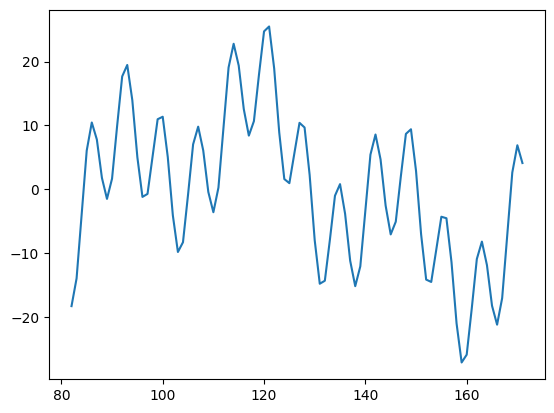

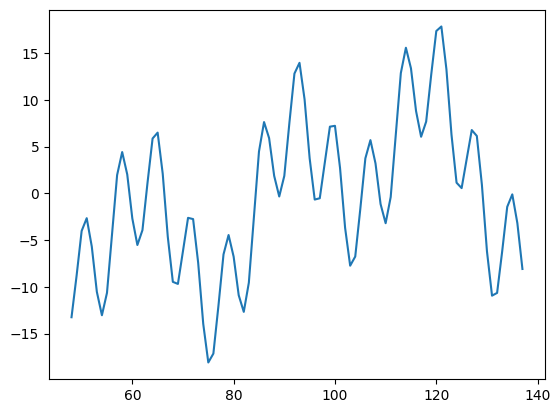

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from fbm import FBM


def generate_sin(x, T, A):
    """Generate a mixed sinusoidal sequence"""
    y = np.zeros(len(x))
    for i in range(len(T)):
        y += A[i] * np.sin(2 * np.pi / T[i] * x)

    return y
def gen_covariates(x, index):
    """Generate covariates"""
    covariates = np.zeros((x.shape[0], 4))
    # 写变量1 与 X是 //24 取余的关系
    covariates[:, 0] = (x // 24) % 7
    # 取余24
    covariates[:, 1] = x % 24
    # 线性
    covariates[:, 2] = (x // (24 * 30)) % 12
    # 随机线性
    covariates[:, 0] = covariates[:, 0] / 6
    covariates[:, 1] = covariates[:, 1] / 23
    covariates[:, 2] = covariates[:, 2] / 11

    covariates[:, -1] = np.zeros(x.shape[0]) + index
    return covariates
"""synthesis a mixed sinusoidal dataset"""
T = [7,28,90] # T[-1] 代表最大周期项跨度
seq_num = 2 # 序列的个数
seq_len = T[-1] * 20 # 长度
data = [] 
covariates = []
for i in range(seq_num):
    # 在 最大周期 区间随机生成1个下标
    #start = int(np.random.uniform(0, T[-1]))
    # 该下标生成对应的序列
    x = start + np.arange(seq_len)
    # A是5~10随机取个数
    A = np.random.uniform(5, 10, 3)
    # 生成sin 正弦序列
    y = generate_sin(x, T, A)
    # 加入y 
    data.append(y)
    covariates.append(gen_covariates(x, i))
    plt.plot(x[:T[-1]], y[:T[-1]])
    plt.show()
# data[0]

In [20]:
# int(np.random.uniform(0, T[-1]))
# np.random.uniform(0, T[-1])

26.29386274276222

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from fbm import FBM


def generate_sin(x, T, A):
    """Generate a mixed sinusoidal sequence"""
    y = np.zeros(len(x))
    for i in range(len(T)):
        y += A[i] * np.sin(2 * np.pi / T[i] * x)

    return y


def gen_covariates(x, index):
    """Generate covariates"""
    covariates = np.zeros((x.shape[0], 4))
    covariates[:, 0] = (x // 24) % 7
    covariates[:, 1] = x % 24
    covariates[:, 2] = (x // (24 * 30)) % 12
    covariates[:, 0] = covariates[:, 0] / 6
    covariates[:, 1] = covariates[:, 1] / 23
    covariates[:, 2] = covariates[:, 2] / 11

    covariates[:, -1] = np.zeros(x.shape[0]) + index
    return covariates


def fractional_brownian_noise(length, hurst, step):
    """Genereate fractional brownian noise"""
    f = FBM(length, hurst, step)
    noise = f.fbm()
    return noise


def synthesis_data():
    """synthesis a mixed sinusoidal dataset"""
    T = [24, 168, 720]
    seq_num = 60
    seq_len = T[-1] * 20
    data = []
    covariates = []
    for i in range(seq_num):
        start = int(np.random.uniform(0, T[-1]))
        x = start + np.arange(seq_len)
        A = np.random.uniform(5, 10, 3)
        y = generate_sin(x, T, A)
        data.append(y)
        covariates.append(gen_covariates(x, i))
        # plt.plot(x[:T[-1]], y[:T[-1]])
        # plt.show()

    data = np.array(data)
    mean, cov = polynomial_decay_cov(seq_len)
    noise = multivariate_normal(mean, cov, seq_num)
    data = data + noise
    covariates = np.array(covariates)
    data = np.concatenate([data[:, :, None], covariates], axis=2)
    np.save('data/synthetic.npy', data)


def covariance(data):
    """compute the covariance of the data"""
    data_mean = data.mean(0)
    data = data - data_mean
    length = data.shape[1]
    data_covariance = np.zeros((length, length))

    for i in range(length):
        for j in range(length):
            data_covariance[i, j] = (data[:, i] * data[:, j]).mean()

    return data_covariance


def test_fbm():
    """Plot the covariance of the generated fractional brownian noise"""
    f = FBM(300, 0.3, 1)
    fbm_data = []
    for i in range(100):
        sample = f.fbm()
        fbm_data.append(sample[1:])
    fbm_data = np.array(fbm_data)
    cov = covariance(fbm_data)
    plt.imshow(cov)
    plt.savefig('fbm_cov.jpg')


def polynomial_decay_cov(length):
    """Define the function of covariance decay with distance"""
    mean = np.zeros(length)

    x_axis = np.arange(length)
    distance = x_axis[:, None] - x_axis[None, :]
    distance = np.abs(distance)
    cov = 1 / (distance + 1)
    return mean, cov


def multivariate_normal(mean, cov, seq_num):
    """Generate multivariate normal distribution"""
    noise = np.random.multivariate_normal(mean, cov, (seq_num,), 'raise')
    return noise


if __name__ == '__main__':
    synthesis_data()



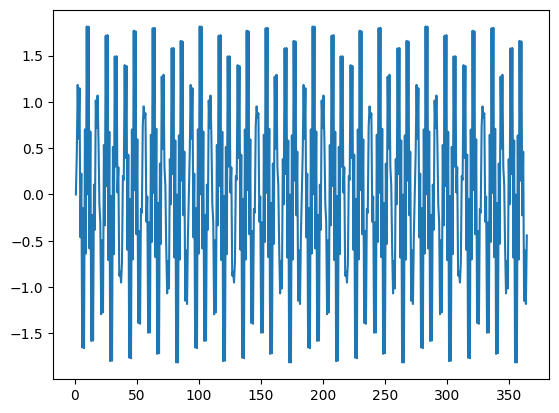

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 设定时间轴
t = np.linspace(1, 365, 500, endpoint=False)

# 创建多个正弦波并将它们相加
# 这里我们创建了三个频率分别为5Hz, 8Hz和12Hz的正弦波
signal = np.sin(2 * np.pi * 7 * t) + np.sin(2 * np.pi * 90 * t)

# 绘制合成的正弦波
plt.plot(t, signal)
plt.show()